# Introduction to Structural Mechanics ME-104
__Studio 07) Crane -- Load on Jib__

Instructors: [Pedro Reis](mailto:Pedro.Reis@epfl.ch), [Till Junge](mailto:till.junge@epfl.ch)

## Learning goals:
- internal loads in beams of mixed structures

## Jupyter Problem J7.1

### Internal loads in the crane's jib.
 A load of $600\, \mathrm{g}$ mass has been attached to your crane $4\,\mathrm{cm}$ from the jib's tip (the jib is the crane's beam on which the pulley runs), see below.

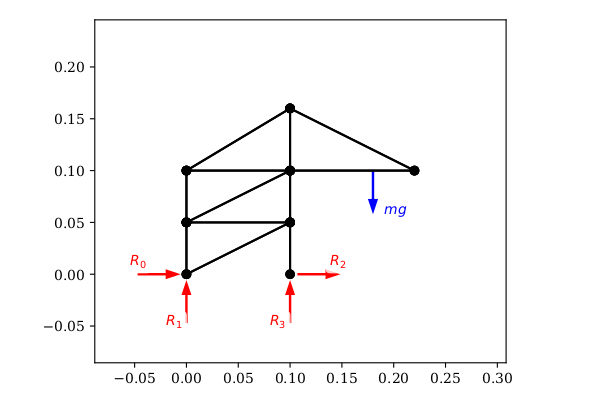

 Draw the internal load diagrams for the jib, and the normal load diagrams for the rest of the crane. Identify the zero-force members.
 
#### Tip:
If you start by computing the vertical reaction forces in the two end points of the jib (both are pinned), you can enter them as external forces in last week's Jupyter crane problem and get all the normal loads in all members for free, see below.

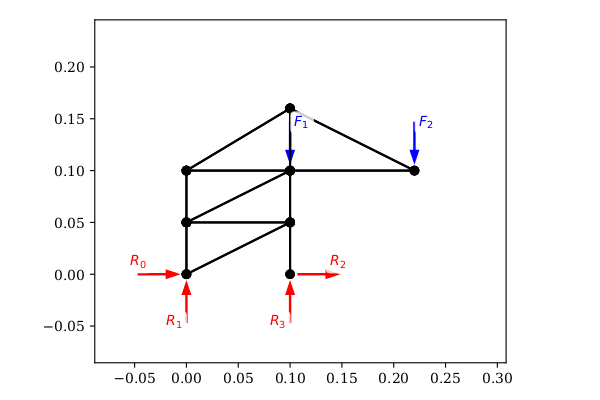

## Solution
We start by recycling the solution of the jupyter exercise in studio 05:

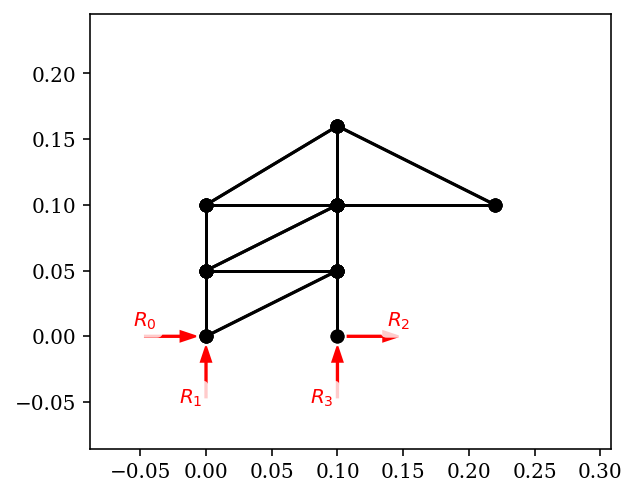

In [1]:
import numpy as np
from two_d_truss import plot_truss

# Description of structure
h_top_frame =  6.0e-2 # in [m]
h_frame =      5.0e-2 # in [m]
w_frame =     10.0e-2 # in [m]
l_beam =      12.0e-2 # in [m]

joints = np.array([[0,                                      0],
                   [w_frame,                                0],
                   [0,                                h_frame],
                   [w_frame,                          h_frame],
                   [0,                              2*h_frame],
                   [w_frame,                        2*h_frame],
                   [w_frame,          2*h_frame + h_top_frame],
                   [w_frame + l_beam,               2*h_frame]])

struts = np.array([[0, 3],
                   [0, 2],
                   [1, 3],
                   [2, 3],
                   [2, 5],
                   [2, 4],
                   [3, 5],
                   [4, 5],
                   [4, 6],
                   [5, 6],
                   [5, 7],
                   [6, 7]])
reactions = [(0, np.array((1., 0.))),
             (0, np.array((0., 1.))),
             (1, np.array((1., 0.))),
             (1, np.array((0., 1.)))]

# inspect the structure so far
plot_truss(joints, struts, reactions, scale=1, border=.16);

Now, let's compute the equivalent forces $F_1$ and $F_2$, using the free-body diagram of the jib

<div>
    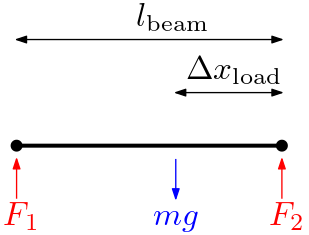
</div>


The sum of forces in the vertical direction is 
$$ \sum F = 0 = F_1 - mg + F_2,$$
and the sum of moment about the left tip is (choosing $x_l = l_\mathrm{beam}-\Delta x_\mathrm{load}$)
$$ \sum M =  0 = - x_lmg + l_\mathrm{beam}F_2$$

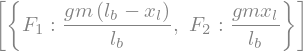

In [2]:
import sympy as sy
sy.init_printing()

# parameters
# (x_l is the x position of the load and l_b the length of the beam)
m, g, xl, lb = sy.symbols("m, g, x_l, l_b", positive=True)

# unknowns
F1, F2 = sy.symbols("F_1 F_2", real=True)

equilibrium = [sy.Eq(0, F1 + F2 - m * g),
               sy.Eq(0, lb * F2 - xl * m * g)]
display(equilibrium)
solutions = sy.solve(equilibrium, (F1, F2), dict=True)
display(solutions)

We find one solution, as expected

In [3]:
solution = solutions[0]

We then substitute the numeric values the way we're used to to

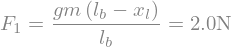

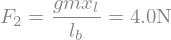

In [4]:
# numeric values
kilogram, newton, metre = sy.symbols(
    r"\mathrm{kg} \mathrm{N} \mathrm{m}", positive=True)

x_load = l_beam - 4e-2 # in [m]
mass = 600e-3 # in [kg]
gravity = 10 # in [m/s^2]
numeric_values = {
    m: mass * kilogram,
    g: gravity * newton/kilogram,
    xl: x_load * metre,
    lb: l_beam * metre
}
display(sy.Eq(F1, sy.Eq(solution[F1], solution[F1].subs(numeric_values))))
display(sy.Eq(F2, sy.Eq(solution[F2], solution[F2].subs(numeric_values))))

Now, we convert these symbolic values into numbers, so that the plotter can use them

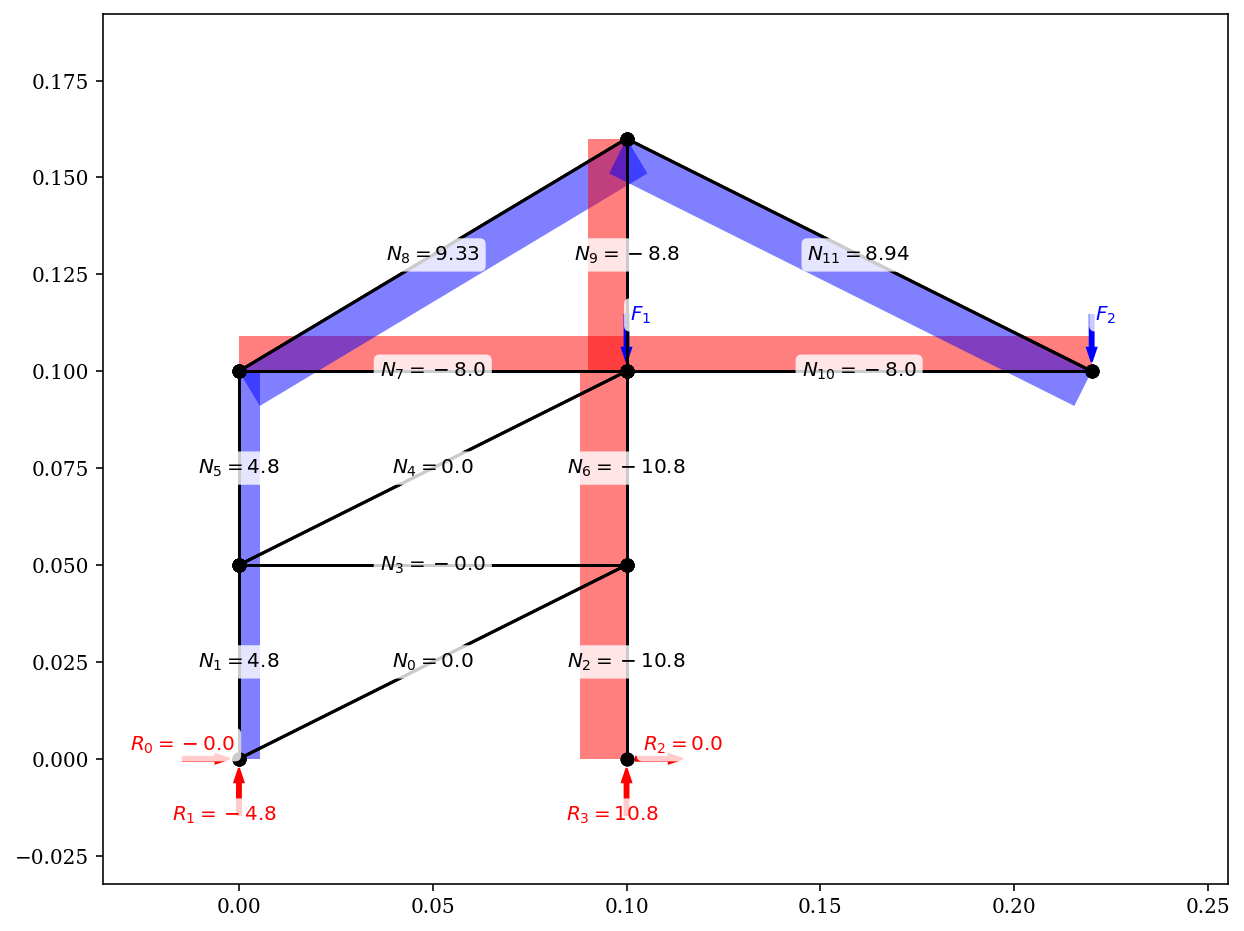

In [6]:
# convert forces to pure numeric values
F1_num = solution[F1].subs(numeric_values)/newton
F2_num = solution[F2].subs(numeric_values)/newton
# express the forces on the structure
forces = [[5, np.array((0, -F1_num), dtype=float)], # F1 is applied on node 5
          [7, np.array((0, -F2_num), dtype=float)]] # F2 is applied on node 7

#plot and compute the result
plot_truss(joints, struts, reactions, forces, scale=2, 
           border=.05, with_solution=True);

The zero-force members are the diagonal struts (struts 0 and 4) and the horizontal strut in the center of the tower (strut 3).

Now, we just need to compute the internal load diagrams for the jib. First, we cut left of the load:

<div>
    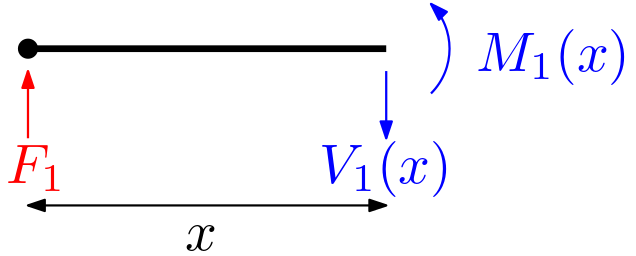
</div>

$$\begin{align}
\sum F_V = 0 &= - F_1 + V_1(x) \Rightarrow V_1(x) = F_1\\
\sum M = 0 &= - x\,V_1(x) + M_1(x) \Rightarrow M_1(x) = F_1x
\end{align}$$


Then, we cut right of the load:

<div>
    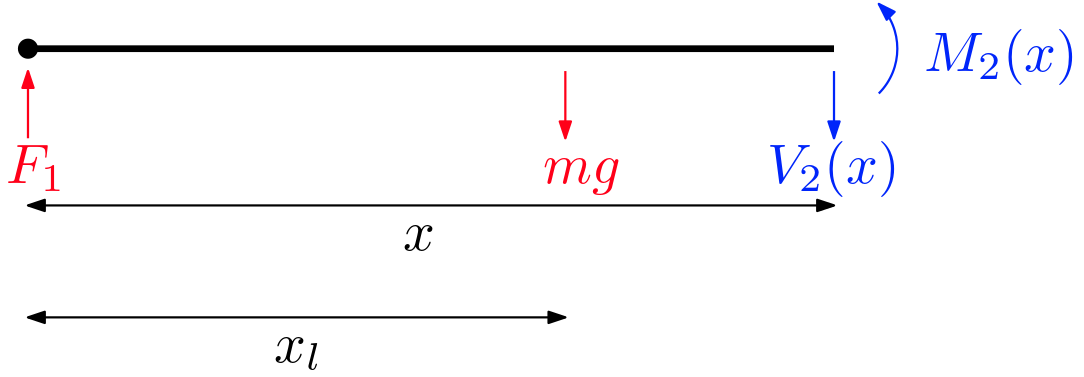
</div>
$$\begin{align}
\sum F_V = 0 &= -F_1 + m g + V_1(x) \Rightarrow V_1(x) = F_1 - mg\\
\sum M = 0 &= -\,F_1(x) + (x-x_l)mg+ M_1(x) \Rightarrow M_1(x) = (F_1 - mg)x + x_l mg
\end{align}$$


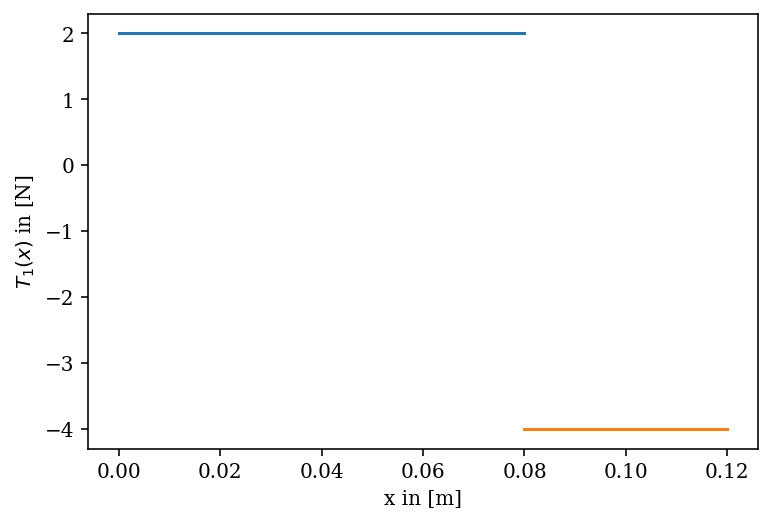

In [9]:
import matplotlib.pyplot as plt
x1 = np.linspace(0, x_load)
x2 = np.linspace(x_load, l_beam)
T1 = F1_num + 0*x1
mg = mass * gravity
T2 = (F1_num - mg)*np.ones_like(x1)
plt.plot(x1, T1)
plt.plot(x2, T2)
plt.xlabel("x in [m]")
plt.ylabel("$T_1(x)$ in [N]");

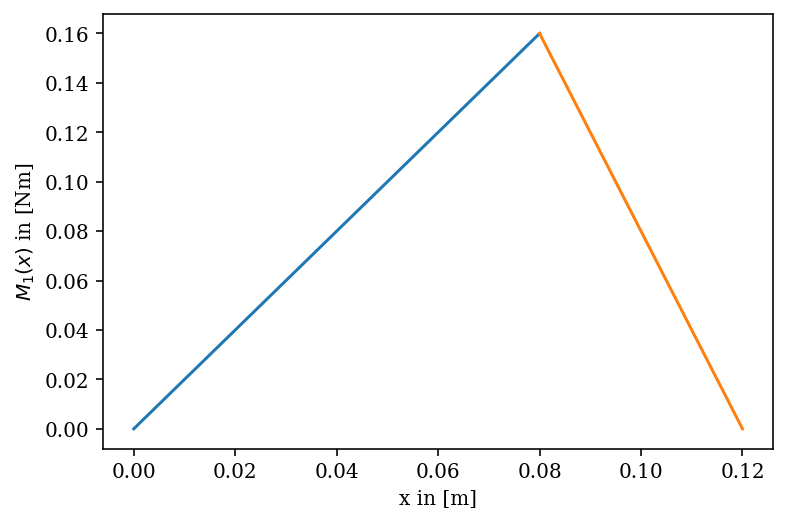

In [10]:
M1 = F1_num*x1
M2 = (F1_num - mg)*x2 + x_load*mg
plt.plot(x1, M1)
plt.plot(x2, M2)
plt.xlabel("x in [m]")
plt.ylabel("$M_1(x)$ in [Nm]");